In [1]:
%tensorflow_version 1.x

import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.optimizers import RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, SGD
from keras.layers import Conv1D, Flatten, LSTM, Reshape, BatchNormalization, Activation, UpSampling1D, ZeroPadding1D, PReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import os

Using TensorFlow backend.


In [4]:
bd_data=[]
bv_data=[]
ba_data=[]
eq_data=[]
trainPath=r"/content/drive/MyDrive/Major Project/New/Data/Training Datasets/SAP Datasets /response03_eq3"
list1=os.listdir(trainPath)
for filename in list1:
  filepath=os.path.join(trainPath,filename)
  disp=np.genfromtxt(filepath,skip_header=19,usecols=(1,2,3))
  disp=disp[0:-1,:]
  bd_data.append(disp)
  vel=np.genfromtxt(filepath,skip_header=19,usecols=(4,5,6))
  vel=vel[0:-1,:]
  bv_data.append(vel)
  acel=np.genfromtxt(filepath,skip_header=19,usecols=(7,8,9))
  acel=acel[0:-1,:]
  ba_data.append(acel)
EqPath=r"/content/drive/MyDrive/Major Project/New/Data/Earthquake Datasets/earth_quake3"
list2=os.listdir(EqPath)
for filename in list2:
  filepath=os.path.join(EqPath,filename)
  eq=np.genfromtxt(filepath)
  # eq=eq[0:-1,]
  eq_data.append(eq)

bd_data=np.array(bd_data)
bv_data=np.array(bv_data)
ba_data=np.array(ba_data)    
eq_data=np.array(eq_data)      
eq_data=eq_data.reshape(15,7200,1)

In [5]:
print(f"Shape of displacement data loaded is\t\t {bd_data.shape}")
print(f"Shape of velocity data loaded is\t\t {bv_data.shape}")
print(f"Shape of accelaration data loaded is\t\t {ba_data.shape}")
print(f"Shape of ground accelaration data loaded is\t {eq_data.shape}")


Shape of displacement data loaded is		 (15, 7200, 3)
Shape of velocity data loaded is		 (15, 7200, 3)
Shape of accelaration data loaded is		 (15, 7200, 3)
Shape of ground accelaration data loaded is	 (15, 7200, 1)


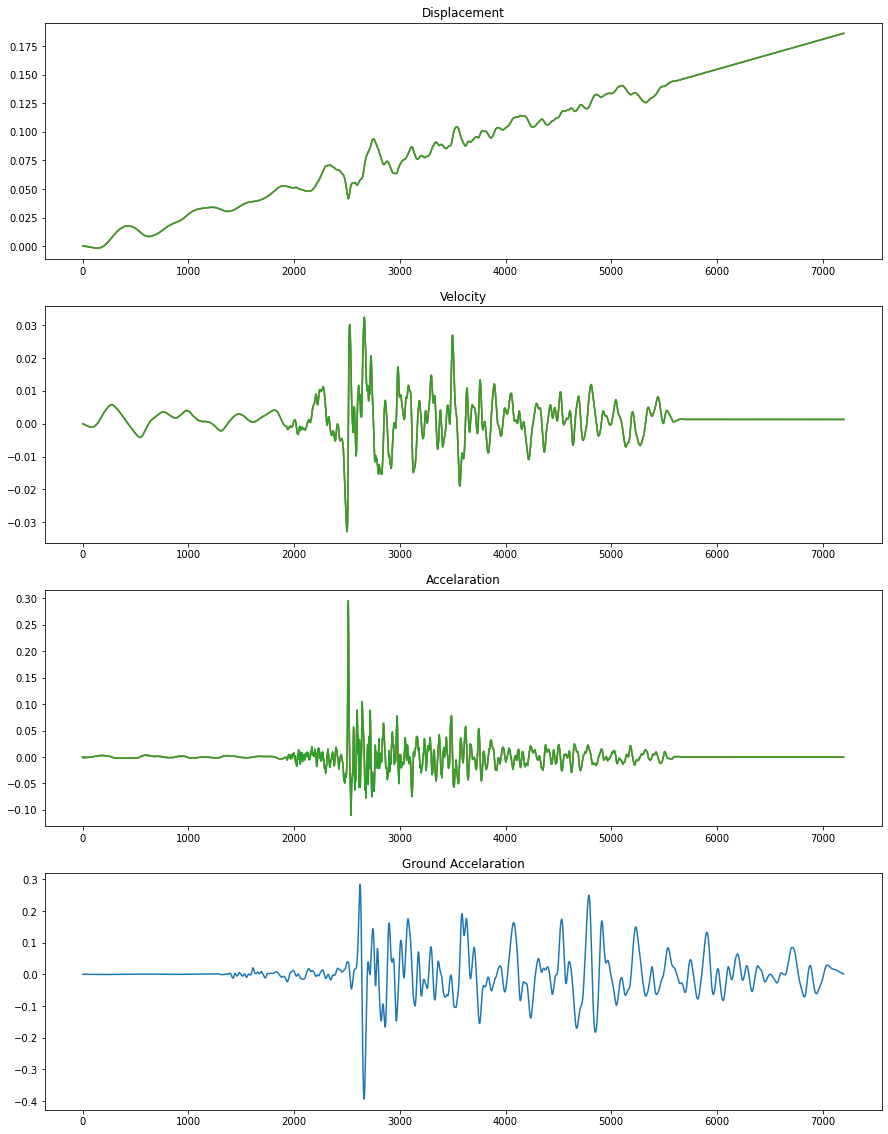

In [6]:
f=7
fig=plt.figure(figsize=(15,20))
ax1=plt.subplot(4,1,1)
ax1.set_title("Displacement")
ax1.plot(bd_data[f,:,:])
ax2=plt.subplot(4,1,2)
ax2.set_title("Velocity")
ax2.plot(bv_data[f,:,:])
ax3=plt.subplot(4,1,3)
ax3.set_title("Accelaration")
ax3.plot(ba_data[f,:,:])
ax4=plt.subplot(4,1,4)
ax4.set_title("Ground Accelaration")
ax4.plot(eq_data[f,:,:])
plt.show()

In [7]:
x_train=eq_data[:,:,0]
y_train=ba_data[:,:,2]
# x_test=eq_data[15:20,:,0]
# y_test=ba_data[15:20,:,5]

In [8]:
print(f"Shape of xtrain is\t\t {x_train.shape}")
print(f"Shape of ytrain is\t\t {y_train.shape}")
# print(f"Shape of xtest is\t\t {x_test.shape}")
# print(f"Shape of ytest is\t\t {y_test.shape}")

Shape of xtrain is		 (15, 7200)
Shape of ytrain is		 (15, 7200)


In [9]:
Time=np.arange(0,144,0.02)[:7200]
print(Time.shape)

(7200,)


In [10]:
#     ag_data = mat['input_tf']  # ag, ad, av
#     u_data = mat['target_X_tf']
#     ut_data = mat['target_Xd_tf']
#     utt_data = mat['target_Xdd_tf']
#     t = mat['time']

    # # Prediction performance
    # ag_pred = np.concatenate([mat['input_tf'], mat['input_pred_tf']])  # ag, ad, av
    # u_pred = np.concatenate([mat['target_X_tf'], mat['target_pred_X_tf']])
    # ut_pred = np.concatenate([mat['target_Xd_tf'], mat['target_pred_Xd_tf']])
    # utt_pred = np.concatenate([mat['target_Xdd_tf'], mat['target_pred_Xdd_tf']])
# bd_data=np.array(bd_data)
# bv_data=np.array(bv_data)
# ba_data=np.array(ba_data)    
# eq_data=np.array(eq_data)
from scipy.io import savemat

mdic={
    "input_tf":x_train,
    "target_X_tf": bd_data[:,:,2],
    "target_Xd_tf":bv_data[:,:,2],
     "target_Xdd_tf":ba_data[:,:,2],
     "time":Time,
    #  "input_pred_tf":x_test,
    #  "target_pred_X_tf":bd_data[15:20,:,5],
    #  "target_pred_Xd_tf":bv_data[15:20,:,5],
    # "target_pred_Xdd_tf":ba_data[15:20,:,5] 

}

savemat(r"/content/drive/MyDrive/Major Project/New/Data/Training Datasets/ModelData/data_num.mat", mdic)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7

Epoch: 0, It: 0, Loss: 7.515e-01, Time: 2.14, Learning Rate: 1.000e-03
Epoch: 1, It: 0, Loss: 7.497e-01, Time: 0.05, Learning Rate: 1.000e-03
Epoch: 2, It: 0, Loss: 7.505e-01, Time: 0.05, Learning Rate: 1.000e-03
Epoch: 3, It: 0, Loss: 7.492e-01, Time: 0.05, Learning Rate: 1.000e-03
Epoch: 4, It: 0, Loss: 7.463e-01, Time: 0.05, Learning Rate: 1.000e-03
Epoch: 5, It: 0, Loss: 7.442e-01, Time: 0.05, Learning Rate: 1.000e-03
Epoch: 6, It: 0, Loss: 7.425e-01, Time: 0.05, Learning Rate: 1.000e-03
Epoch: 7, It: 0, Loss: 7.365e-01, Time: 0.04, Learning Rate: 1.000e-03
Epoch: 8, It: 0, Loss: 7.329e-01, Time: 0.04, Learning Rate: 1.000e-03
Epoch: 9, It: 0, Loss: 7.277e-01, Time: 0.04, Learning Rate: 1.000e-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:262: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

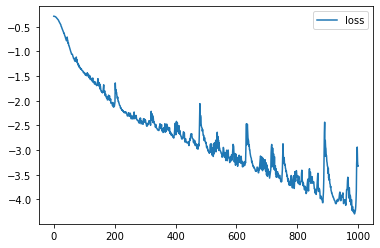

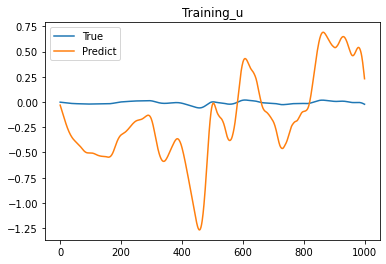

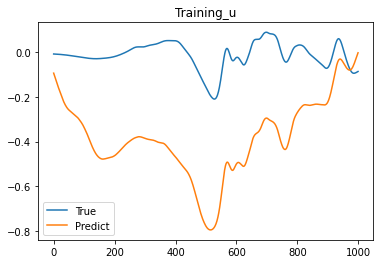

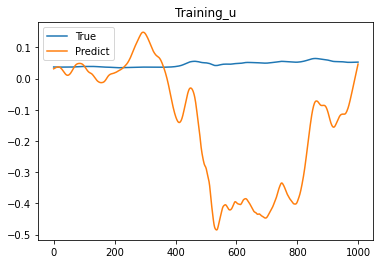

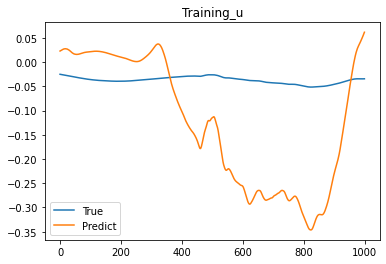

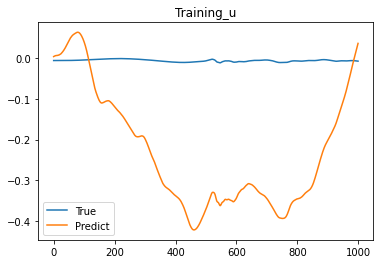

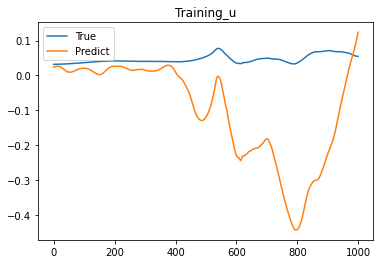

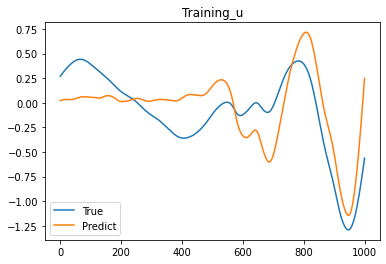

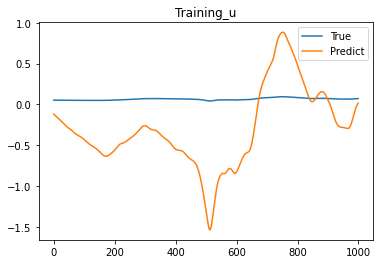

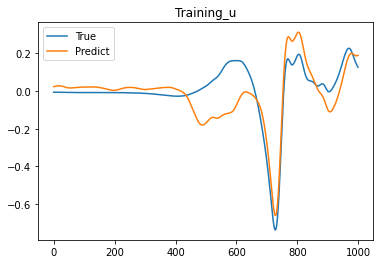

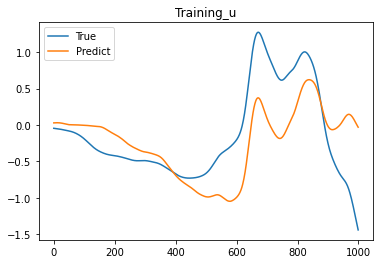

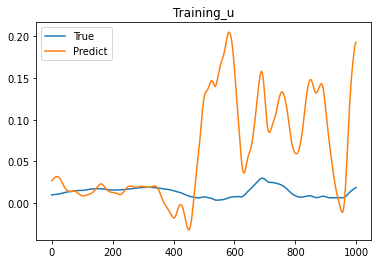

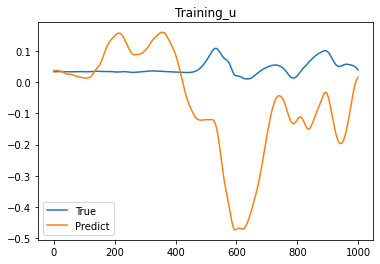

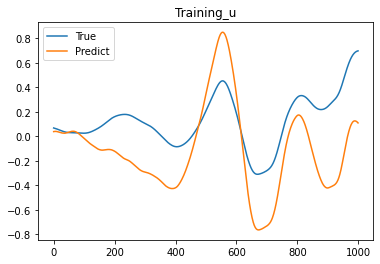

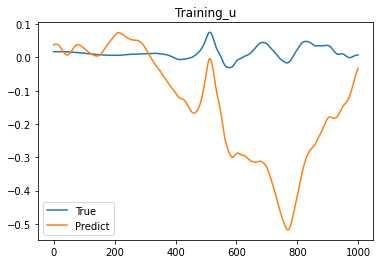

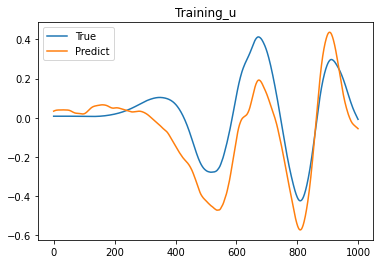

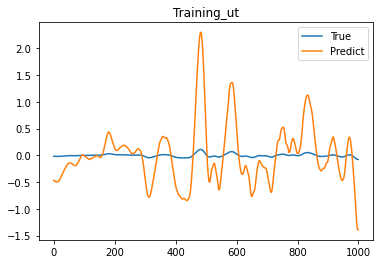

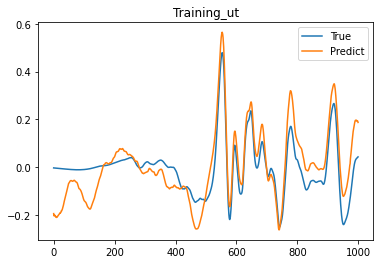

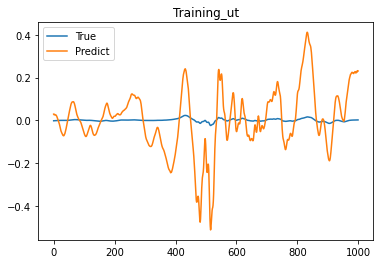

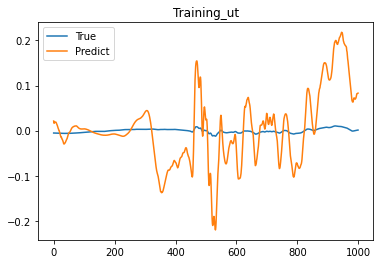

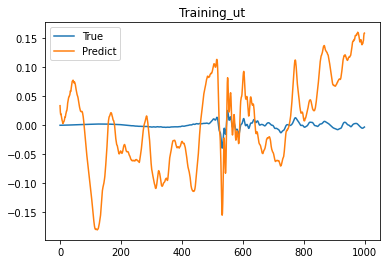

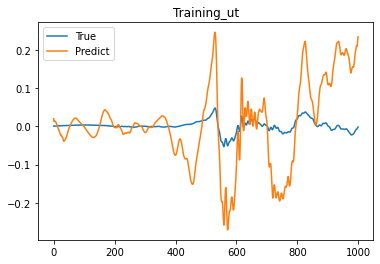

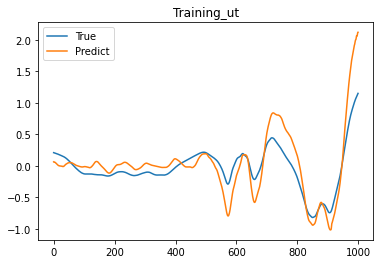

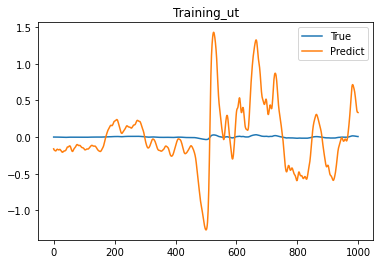

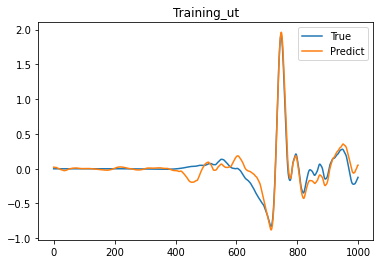

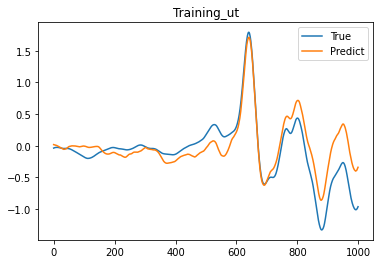

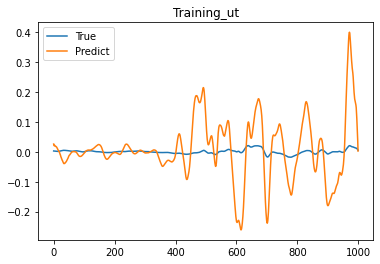

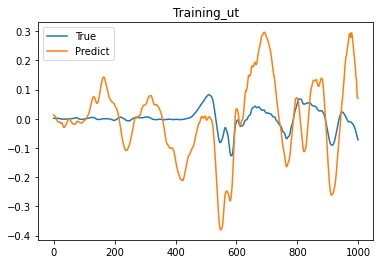

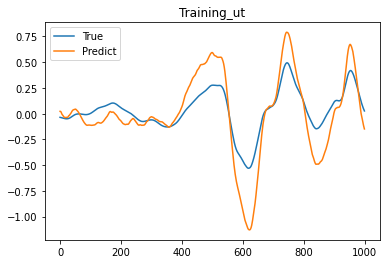

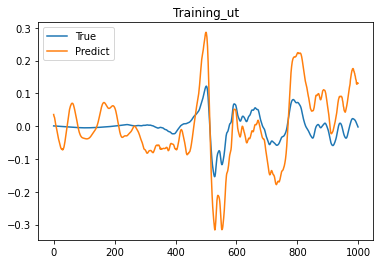

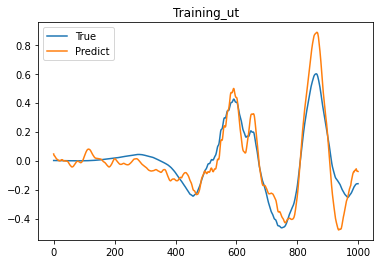

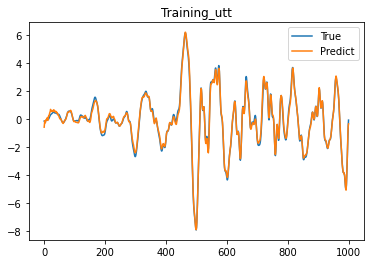

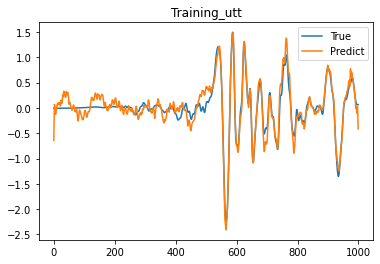

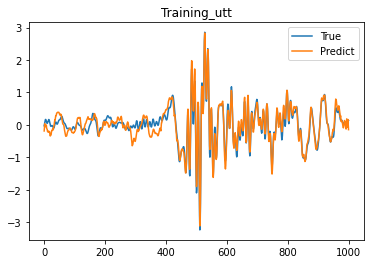

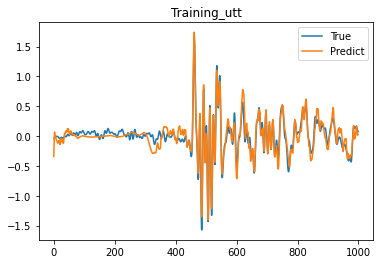

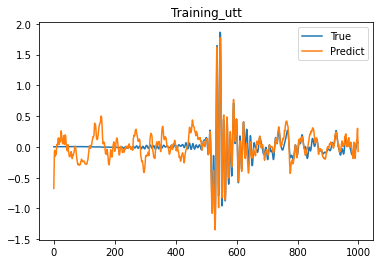

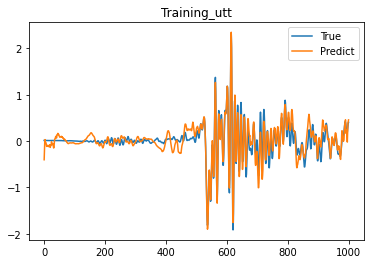

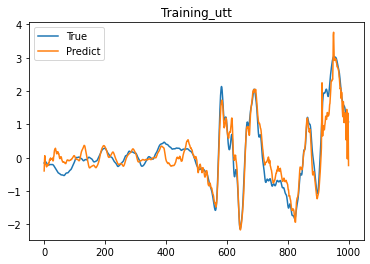

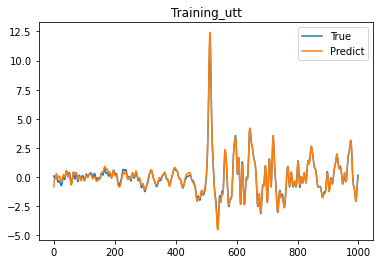

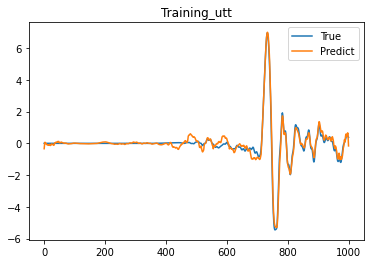

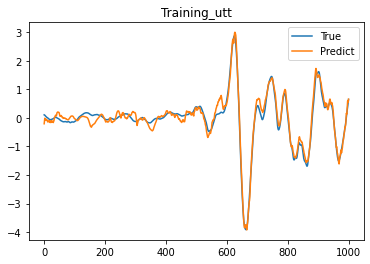

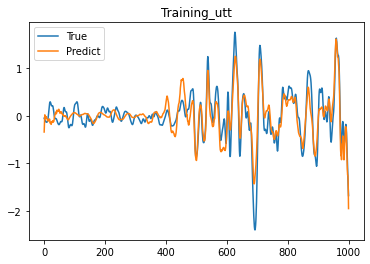

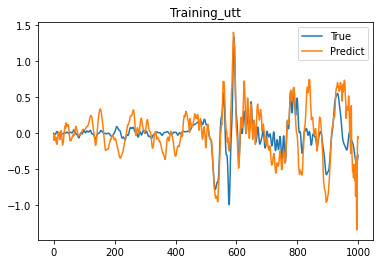

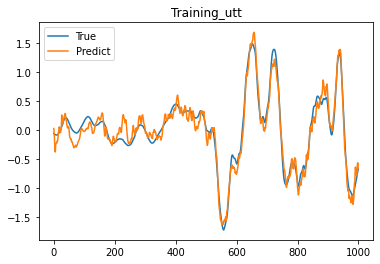

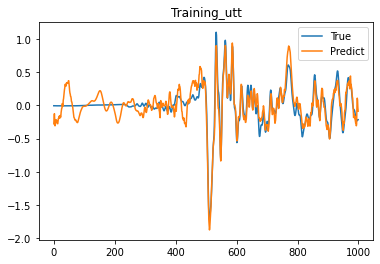

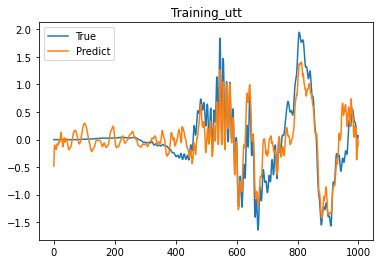

In [20]:

class DeepPhyLSTM:
    # Initialize the class
    def __init__(self, eta_tt, ag, Phi_t):

        # data
        self.eta_tt = eta_tt
        self.ag = ag
        # self.lift = lift
        # self.ag_c = ag_c
        self.Phi_t = Phi_t
        # self.Phi_tt = Phi_tt

        # tf placeholders and graph
        self.sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,
                                                     log_device_placement=True))
        
        # placeholders for data
        self.learning_rate = tf.placeholder(tf.float32, shape=[])
        # self.eta_tf = tf.placeholder(tf.float32, shape=[None, None, self.eta.shape[2]])
        # self.eta_t_tf = tf.placeholder(tf.float32, shape=[None, None, self.eta.shape[2]])
        self.eta_tt_tf = tf.placeholder(tf.float32, shape=[None, None, 1])
        self.ag_tf = tf.placeholder(tf.float32, shape=[None, None, 1])

        # physics informed neural networks
        self.eta_pred, self.eta_t_pred, self.eta_tt_pred, = self.net_structure(self.ag_tf)

        # loss
        # for measurements
        self.loss = tf.reduce_mean(tf.square(self.eta_tt_tf - self.eta_tt_pred))

        # optimizers
        self.optimizer = tf.contrib.opt.ScipyOptimizerInterface(self.loss,
                                                                method='L-BFGS-B',
                                                                options={'maxiter': 20000,
                                                                         'maxfun': 50000,
                                                                         'maxcor': 50,
                                                                         'maxls': 50,
                                                                         'ftol': 1 * np.finfo(float).eps})

        self.optimizer_Adam = tf.train.AdamOptimizer(learning_rate = self.learning_rate)
        self.train_op = self.optimizer_Adam.minimize(self.loss)

        init = tf.global_variables_initializer()
        self.sess.run(init)

    def CNN_model(self, X):
        model = Sequential()
        model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True, input_shape=(None, 1)))
        model.add(Activation('relu'))
        model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True))
        model.add(Activation('relu'))
        model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True))
        model.add(Activation('relu'))
        model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True))
        model.add(Activation('relu'))
        model.add(Conv1D(64, 50, strides=1, padding='same', use_bias=True))
        model.add(Activation('relu'))
        model.add(Dense(50))
        model.add(Activation('relu'))
        model.add(Dense(50))
        model.add(Activation('relu'))
        model.add(Dense(self.eta_tt.shape[2]))
        y = model(X)
        return y

    def net_structure(self, ag):
        eta = self.CNN_model(ag)

        Phi_ut = np.reshape(self.Phi_t, [1, self.eta_tt.shape[1], self.eta_tt.shape[1]])
        Phi_ut = np.repeat(Phi_ut, self.eta_tt.shape[0], axis=0)
        eta_t = tf.matmul(tf.cast(Phi_ut, dtype=tf.float32), eta)
        eta_tt = tf.matmul(tf.cast(Phi_ut, dtype=tf.float32), eta_t)

        return eta, eta_t, eta_tt
    
    def train(self, num_epochs, batch_size, learning_rate, bfgs):

        Loss = []

        for epoch in range(num_epochs):
            
            N = self.eta_tt.shape[0]

            start_time = time.time()
            for it in range(0, N, batch_size):
                tf_dict = {self.eta_tt_tf: self.eta_tt, self.ag_tf: self.ag, self.learning_rate: learning_rate}
                self.sess.run(self.train_op, tf_dict)
                
                # Print
                if it % (10*batch_size) == 0:
                    elapsed = time.time() - start_time
                    loss_value, learning_rate_value = self.sess.run([self.loss, self.learning_rate], tf_dict)
                    print('Epoch: %d, It: %d, Loss: %.3e, Time: %.2f, Learning Rate: %.3e'
                          %(epoch, it/batch_size, loss_value, elapsed, learning_rate_value))
                    start_time = time.time()

            Loss.append(self.sess.run(self.loss, tf_dict))

        if bfgs == 1:
            tf_dict_all = {self.eta_tt_tf: self.eta_tt, self.ag_tf: self.ag, self.learning_rate: learning_rate}

            self.optimizer.minimize(self.sess,
                                    feed_dict=tf_dict_all,
                                    fetches=[self.loss],
                                    loss_callback=self.callback)

            Loss.append(self.sess.run(self.loss, tf_dict))

        return Loss

    def callback(self, loss):
        print('Loss:', loss)

    def predict(self, ag_star):
        
        tf_dict = {self.ag_tf: ag_star}

        eta_star = self.sess.run(self.eta_pred, tf_dict)
        eta_t_star = self.sess.run(self.eta_t_pred, tf_dict)
        eta_tt_star = self.sess.run(self.eta_tt_pred, tf_dict)

        return eta_star, eta_t_star, eta_tt_star
    
if __name__ == "__main__":

    # load data
    dataDir = "/content/drive/MyDrive/Major Project/New/Data/Training Datasets/ModelData/"
    mat = scipy.io.loadmat(dataDir + 'data_num.mat')
    ag_data=np.zeros([15,2000])
    u_data=np.zeros([15,2000])
    ut_data=np.zeros([15,2000])
    utt_data=np.zeros([15,2000])

    ag_data = mat['input_tf'][:,2000:3000] # ag, ad, av
 #   for i in range(ag_dat.shape[0]):
 #     ag_data[i]=(ag_dat[i]-ag_dat[i].min())/(ag_dat[i].max()-ag_dat[i].min())
      

    u_data = mat['target_X_tf'][:,2000:3000]
 #   for i in range(u_dat.shape[0]):
 #     u_data[i]=(u_dat[i]-u_dat[i].min())/(u_dat[i].max()-u_dat[i].min())
          

    ut_data = mat['target_Xd_tf'][:,2000:3000]
#    for i in range(ut_dat.shape[0]):
#      ut_data[i]=(ut_dat[i]-ut_dat[i].min())/(ut_dat[i].max()-ut_dat[i].min())
        

    utt_data = mat['target_Xdd_tf'][:,2000:3000]
    a=[[20,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [0,0,20,0,0,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,20,0,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,4,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,5,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,2,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,40,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0,20,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0,0,2,0,0,0],
   [0,0,0,0,0,0,0,0,0,0,0,0,2,0,0],
   [0,0,0,0,0,0,0,0,0,0,0,0,0,2,0],
   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2]]
    a=np.array(a)
    utt_data=np.matmul(a,utt_data)
#   for i in range(utt_dat.shape[0]):
#    utt_data[i]=(utt_dat[i]-utt_dat[i].min())/(utt_dat[i].max()-utt_dat[i].min())
      


    ag_data = ag_data.reshape([ag_data.shape[0], ag_data.shape[1], 1])
    u_data = u_data.reshape([u_data.shape[0], u_data.shape[1], 1])
    ut_data = ut_data.reshape([ut_data.shape[0], ut_data.shape[1], 1])
    utt_data = utt_data.reshape([utt_data.shape[0], utt_data.shape[1], 1])

    t = mat['time']
    dt = t[0, 1] - t[0, 0]

    ag_all = ag_data
    u_all = u_data
    u_t_all = ut_data
    u_tt_all = utt_data

    # finite difference
    n = u_data.shape[1]
    phi1 = np.concatenate([np.array([-3 / 2, 2, -1 / 2]), np.zeros([n - 3, ])])
    temp1 = np.concatenate([-1 / 2 * np.identity(n - 2), np.zeros([n - 2, 2])], axis=1)
    temp2 = np.concatenate([np.zeros([n - 2, 2]), 1 / 2 * np.identity(n - 2)], axis=1)
    phi2 = temp1 + temp2
    phi3 = np.concatenate([np.zeros([n - 3, ]), np.array([1 / 2, -2, 3 / 2])])
    Phi_t = 1 / dt * np.concatenate(
            [np.reshape(phi1, [1, phi1.shape[0]]), phi2, np.reshape(phi3, [1, phi3.shape[0]])], axis=0)

    ag_star = ag_all[0:50]
    eta_star = u_all[0:50]
    eta_t_star = u_t_all[0:50]
    eta_tt_star = u_tt_all[0:50]
    g_star = -eta_tt_star -ag_star
    lift_star = -ag_star

    N_train = eta_star.shape[0]

    eta = eta_star
    ag = ag_star
    lift = lift_star
    eta_t = eta_t_star
    eta_tt = eta_tt_star
    g = g_star

    # Training Data
    eta_train = eta
    ag_train = ag
    lift_train = lift
    eta_t_train = eta_t
    eta_tt_train = eta_tt
    g_train = g


with tf.device('/device:GPU:0'):
    # with tf.device('/cpu:0'):

    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    # config.gpu_options.per_process_gpu_memory_fraction = 0.4
    session = tf.Session(config=config)
    # tf.Session(config=tf.ConfigProto(log_device_placement=True))

    # Training
    model = DeepPhyLSTM(eta_tt_train, ag_train, Phi_t)

    train_loss = model.train(num_epochs=1000, batch_size=N_train, learning_rate=1e-3, bfgs=1)
 
    plt.figure()
    plt.plot(np.log(train_loss), label='loss')
    # plt.plot(np.log(test_loss), label='loss_val')
    plt.legend()
    # Training performance
    X_train = ag_train
    y_train_ref = eta_train
    yt_train_ref = eta_t_train
    ytt_train_ref = eta_tt_train
    # g_train_ref = -eta_tt_train-ag_train

    # Prediction
    eta, eta_t, eta_tt= model.predict(X_train)

    y_train_pred = eta
    yt_train_pred = eta_t
    ytt_train_pred = eta_tt

    dof = 0
    for n in range(len(ag_star)):
        plt.figure()
        plt.plot(y_train_ref[n, :, dof], label='True')
        plt.plot(y_train_pred[n, :, dof], label='Predict')
        plt.title('Training_u')
        plt.legend()

    for n in range(len(ag_star)):
        plt.figure()
        plt.plot(yt_train_ref[n, :, dof], label='True')
        plt.plot(yt_train_pred[n, :, dof], label='Predict')
        plt.title('Training_ut')
        plt.legend()

    for n in range(len(ag_star)):
        plt.figure()
        plt.plot(ytt_train_ref[n, :, dof], label='True')
        plt.plot(ytt_train_pred[n, :, dof], label='Predict')
        plt.title('Training_utt')
        plt.legend()

    # Prediction performance
    # ag_pred = np.concatenate([mat['input_tf'], mat['input_pred_tf']])  # ag, ad, av
    # u_pred = np.concatenate([mat['target_X_tf'], mat['target_pred_X_tf']])
    # ut_pred = np.concatenate([mat['target_Xd_tf'], mat['target_pred_Xd_tf']])
    # utt_pred = np.concatenate([mat['target_Xdd_tf'], mat['target_pred_Xdd_tf']])
    # ag_pred = ag_pred.reshape([ag_pred.shape[0], ag_pred.shape[1], 1])
    # u_pred = u_pred.reshape([u_pred.shape[0], u_pred.shape[1], 1])
    # ut_pred = ut_pred.reshape([ut_pred.shape[0], ut_pred.shape[1], 1])
    # utt_pred = utt_pred.reshape([utt_pred.shape[0], utt_pred.shape[1], 1])

    # X_pred = ag_pred[50:]
    # y_pred_ref = u_pred[50:]
    # yt_pred_ref = ut_pred[50:]
    # ytt_pred_ref = utt_pred[50:]

    # Index_train = list(range(0, 50))

    # # Prediction
    # n_p = int(np.ceil(len(X_pred) / len(Index_train)))
    # y_pred = np.zeros(y_pred_ref.shape)
    # yt_pred = np.zeros(y_pred_ref.shape)
    # ytt_pred = np.zeros(ytt_pred_ref.shape)
    # for jj in range(n_p):
    #     ind_str = len(Index_train) * jj
    #     ind_end = len(Index_train) * (jj + 1)
    #     eta, eta_t, eta_tt = model.predict(X_pred[ind_str:ind_end])
    #     y_pred[ind_str:ind_end] = eta
    #     yt_pred[ind_str:ind_end] = eta_t
    #     ytt_pred[ind_str:ind_end] = eta_tt

    # for ii in range(len(y_pred)):
    #     plt.figure()
    #     plt.plot(y_pred_ref[ii, :, dof], label='True')
    #     plt.plot(y_pred[ii, :, dof], label='Predict')
    #     plt.title('Prediction_u')
    #     plt.legend()

    #     plt.figure()
    #     plt.plot(yt_pred_ref[ii], label='True')
    #     plt.plot(yt_pred[ii], label='Predict')
    #     plt.title('Prediction_u_t')
    #     plt.legend()

    #     plt.figure()
    #     plt.plot(ytt_pred_ref[ii], label='True')
    #     plt.plot(ytt_pred[ii], label='Predict')
    #     plt.title('Prediction_u_tt')
    #     plt.legend()

    # R1 = []
    # R2 = []
    # R3 = []
    # for ii in range(len(y_pred_ref)):
    #     reg1 = LinearRegression().fit(y_pred_ref[ii, :, 0:1], y_pred[ii, :, 0:1])
    #     R1.append(reg1.coef_)
    # R = np.concatenate([np.array(R1)])
    # R = R[:, 0]
    # plt.hist(R, 'auto', density=True, facecolor='blue', alpha=0.5)
    # plt.grid(axis='y', alpha=0.75)
    # plt.xlabel('Value')
    # plt.ylabel('Frequency')
    # plt.title('Histogram_Model')
    # ax = plt.gca()
    # ax.invert_xaxis()

# # save results
# scipy.io.savemat(dataDir + 'results/results_num_ag2utt.mat',
#                  {'y_train_ref': y_train_ref, 'yt_train_ref': yt_train_ref, 'ytt_train_ref': ytt_train_ref,
#                   'y_train_pred': y_train_pred, 'yt_train_pred': yt_train_pred, 'ytt_train_pred': ytt_train_pred,
#                   'y_pred_ref': y_pred_ref, 'yt_pred_ref': yt_pred_ref, 'ytt_pred_ref': ytt_pred_ref,
#                   'y_pred': y_pred, 'yt_pred': yt_pred, 'ytt_pred': ytt_pred,
#                   'X_train': X_train, 'X_pred': X_pred, 'time': t, 'dt': dt,
#                   'train_loss': train_loss})

In [18]:
a=[[20,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [0,0,20,0,0,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,20,0,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,4,0,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,5,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,2,0,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,40,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0,20,0,0,0,0],
   [0,0,0,0,0,0,0,0,0,0,0,2,0,0,0],
   [0,0,0,0,0,0,0,0,0,0,0,0,2,0,0],
   [0,0,0,0,0,0,0,0,0,0,0,0,0,2,0],
   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2]]

a=np.array(a)

In [12]:
utt_data = mat['target_Xdd_tf']

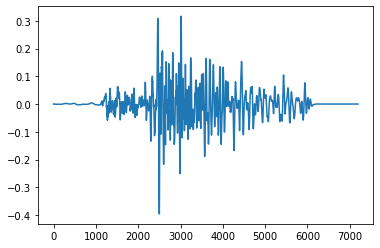

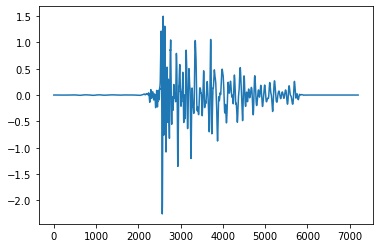

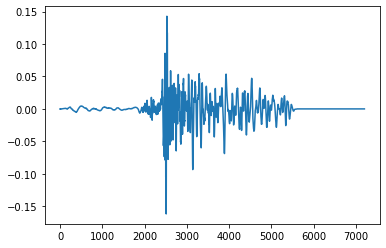

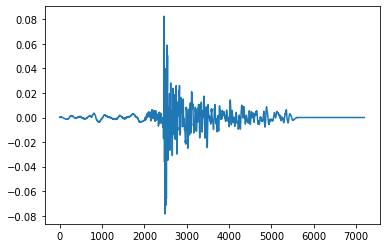

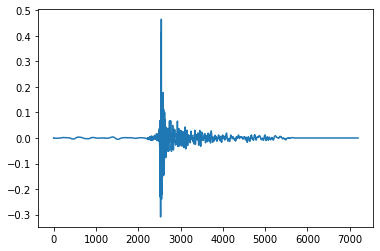

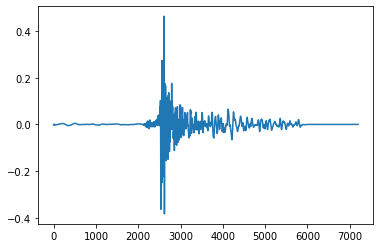

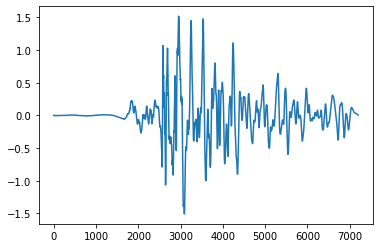

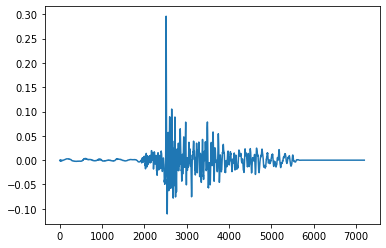

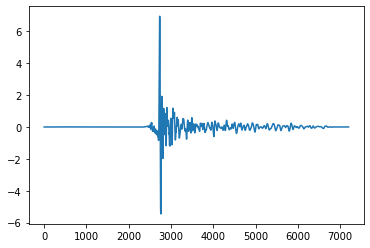

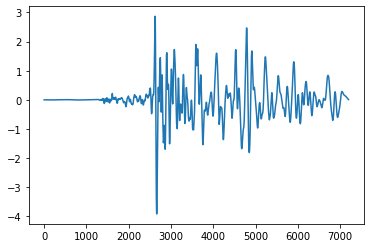

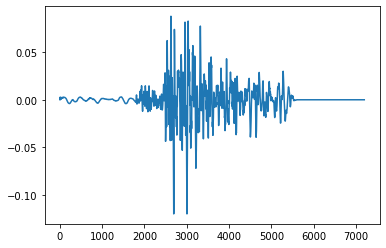

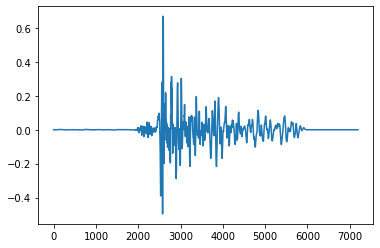

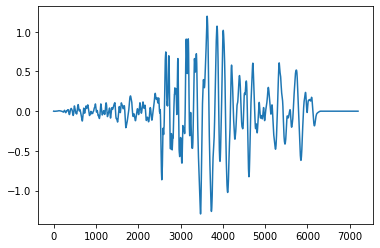

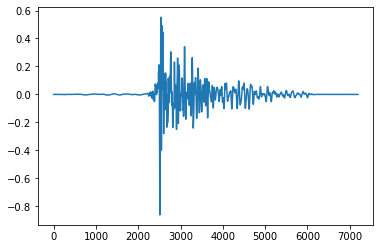

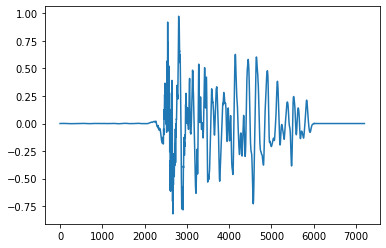

In [13]:
for i in range(utt_data.shape[0]):
  plt.figure()
  plt.plot(utt_data[i])